In [1]:
# Some sample plots for interval level effects

In [15]:
library(ggplot2)
library(cowplot)
theme_set(theme_cowplot(font_size=8))

In [17]:
## Read signals, extract directions and distance thresholds
signals = read.csv("../metrics/all_intervals2.csv")

# Assign direction columns for acceleration and jerk (positive for >= 0 and negative for < 0)
signals$pos_latA <- signals$MaxLatAcc >= 0
signals$pos_longA <- signals$MaxLongAcc >= 0

signals$pos_latJ <- signals$MaxLatJerk >= 0
signals$pos_longJ <- signals$MaxLongJerk >= 0

signals$present_stop <- cut(signals$LongDist, c(0, 190, 200), labels=c("Yes", "No"))

In [18]:
## Calculate points of interest for different vehicle state predictors

#---------------------------------Acceleration Max --------------------------------------#
# points of interest for +ve and -ve LongAcc
max_pos <- max(signals[signals$pos_longA == TRUE, "MaxLongAcc"])
mid_pos <- max_pos / 3
max_neg <- min(signals[signals$pos_longA == FALSE, "MaxLongAcc"])
mid_neg <- max_neg / 3

signals$lvlLongA <- cut(
    signals$MaxLongAcc,
    c(max_neg + 0.01, 2 * mid_neg, mid_neg, 0, mid_pos, 2 * mid_pos, max_pos),
    labels=c("-High", "-Mid", "-Low", "+Low", "+Mid", "+High")
)
signals$lvlLongA <- factor(
    signals$lvlLongA, 
    levels=c("-Low", "-Mid", "-High", "+Low", "+Mid", "+High")
)

# points of interest for +ve and -ve LatAcc
max_pos <- max(signals[signals$pos_latA == TRUE, "MaxLatAcc"])
mid_pos <- max_pos / 3
max_neg <- min(signals[signals$pos_latA == FALSE, "MaxLatAcc"])
mid_neg <- max_neg / 3

signals$lvlLatA <- cut(
    signals$MaxLatAcc, 
    c(max_neg + 0.01, 2 * mid_neg, mid_neg, 0, mid_pos, 2 * mid_pos, max_pos),
    labels=c("-High", "-Mid", "-Low", "+Low", "+Mid", "+High")
)
signals$lvlLatA <- factor(
    signals$lvlLatA, 
    levels=c("-Low", "-Mid", "-High", "+Low", "+Mid", "+High")
)

#---------------------------------------Jerk Max----------------------------------------#
# points of interest for +ve and -ve LongJerk
max_pos <- max(signals[signals$pos_longJ == TRUE, "MaxLongJerk"])
mid_pos <- max_pos / 3
max_neg <- min(signals[signals$pos_longJ == FALSE, "MaxLongJerk"])
mid_neg <- max_neg / 3

signals$lvlLongJ <- cut(
    signals$MaxLongJerk, 
    c(max_neg + 0.01, 2 * mid_neg, mid_neg, 0, mid_pos, 2 * mid_pos, max_pos),
    labels=c("-High", "-Mid", "-Low", "+Low", "+Mid", "+High")
)
signals$lvlLongJ <- factor(
    signals$lvlLongJ, 
    levels=c("-Low", "-Mid", "-High", "+Low", "+Mid", "+High")
)


# points of interest for +ve and -ve LatJerk
max_pos <- max(signals[signals$pos_latJ == TRUE, "MaxLatJerk"])
mid_pos <- max_pos / 3
max_neg <- min(signals[signals$pos_latJ == FALSE, "MaxLatJerk"])
mid_neg <- max_neg / 3

signals$lvlLatJ <- cut(
    signals$MaxLatJerk, 
    c(max_neg + 0.01, 2 * mid_neg, mid_neg, 0, mid_pos, 2 * mid_pos, max_pos),
    labels=c("-High", "-Mid", "-Low", "+Low", "+Mid", "+High")
)
signals$lvlLatJ <- factor(
    signals$lvlLatJ, 
    levels=c("-Low", "-Mid", "-High", "+Low", "+Mid", "+High")
)

#------------------------------- Acceleration Mean -------------------------------------#
# points of interest for MeanLongAcc
max_pos <- max(signals$MeanLongAcc)
mid_pos <- max_pos / 3

signals$meanlvlLongA <- cut(
    signals$MeanLongAcc, 
    c(0, mid_pos, 2 * mid_pos, max_pos),
    labels=c("Low", "Mid", "High")
)
signals$meanlvlLongA <- factor(
    signals$meanlvlLongA, 
    levels=c("Low", "Mid", "High")
)

# points of interest for MeanLatAcc
max_pos <- max(signals$MeanLatAcc)
mid_pos <- max_pos / 3

signals$meanlvlLatA <- cut(
    signals$MeanLatAcc, 
    c(0, mid_pos, 2 * mid_pos, max_pos),
    labels=c("Low", "Mid", "High")
)
signals$meanlvlLatA <- factor(
    signals$meanlvlLatA, 
    levels=c("Low", "Mid", "High")
)

#------------------------------------ Jerk Mean ----------------------------------------#
# points of interest for MeanLongJerk
max_pos <- max(signals$MeanLongJerk)
mid_pos <- max_pos / 3

signals$meanlvlLongJ <- cut(
    signals$MeanLongJerk, 
    c(0, mid_pos, 2 * mid_pos, max_pos),
    labels=c("Low", "Mid", "High")
)
signals$meanlvlLongJ <- factor(
    signals$meanlvlLongJ, 
    levels=c("Low", "Mid", "High")
)

# points of interest for MeanLatJerk
max_pos <- max(signals$MeanLatJerk)
mid_pos <- max_pos / 3

signals$meanlvlLatJ <- cut(
    signals$MeanLatJerk, 
    c(0, mid_pos, 2 * mid_pos, max_pos),
    labels=c("Low", "Mid", "High")
)
signals$meanlvlLatJ <- factor(
    signals$meanlvlLatJ, 
    levels=c("Low", "Mid", "High")
)

In [19]:
# Levels for labelling plots
signals$pos_longA <- factor(signals$pos_longA)
levels(signals$pos_longA)=c(expression("-"~a["long"]), expression("+"~a["long"]))

signals$pos_longJ <- factor(signals$pos_longJ)
levels(signals$pos_longJ)=c(expression("-"~dot(a)["long"]), expression("+"~dot(a)["long"]))

signals$pos_latA <- factor(signals$pos_latA)
levels(signals$pos_latA)=c(expression("-"~a["lat"]), expression("+"~a["lat"]))

signals$pos_latJ <- factor(signals$pos_latJ)
levels(signals$pos_latJ)=c(expression("-"~dot(a)["lat"]), expression("+"~dot(a)["lat"]))

signals$present_stop <- factor(signals$LongDist < 190)
levels(signals$present_stop)
levels(signals$present_stop)=c("Not present", "Present")
signals$present_pass <- factor(signals$LatDist < 190)
levels(signals$present_pass)
levels(signals$present_pass)=c("Not present", "Present")

[1] "FALSE" "TRUE"

[1] "FALSE" "TRUE"

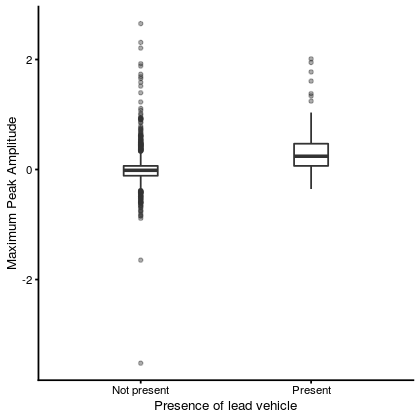

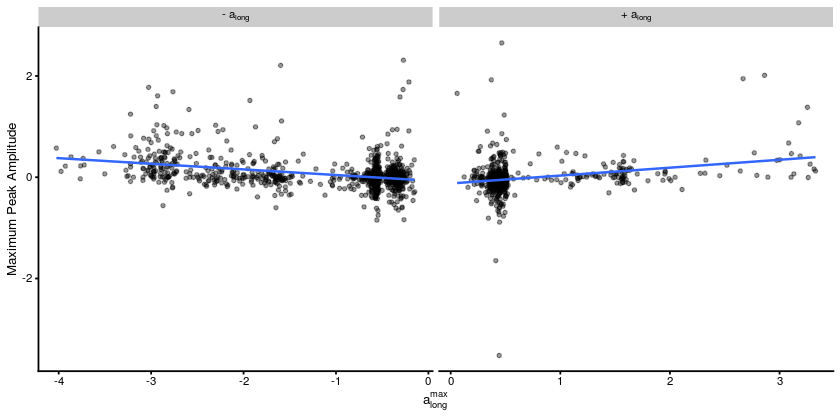

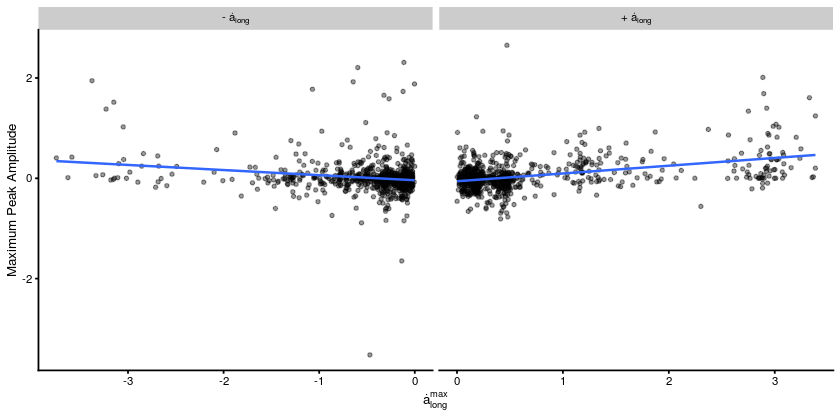

Warning message:
“Removed 18 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 19 rows containing missing values (geom_point).”

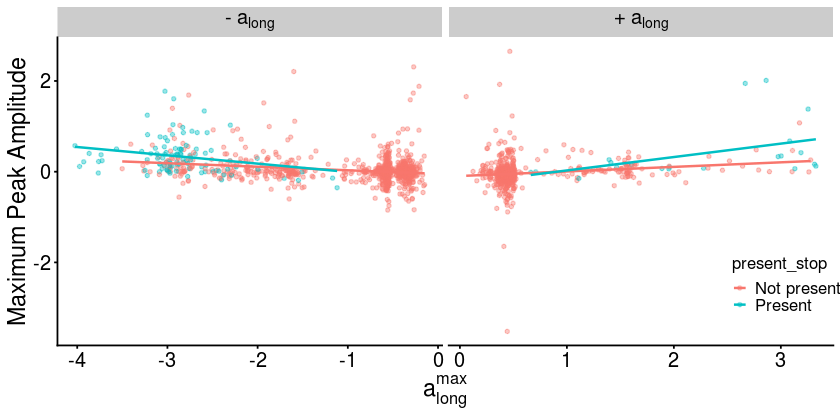

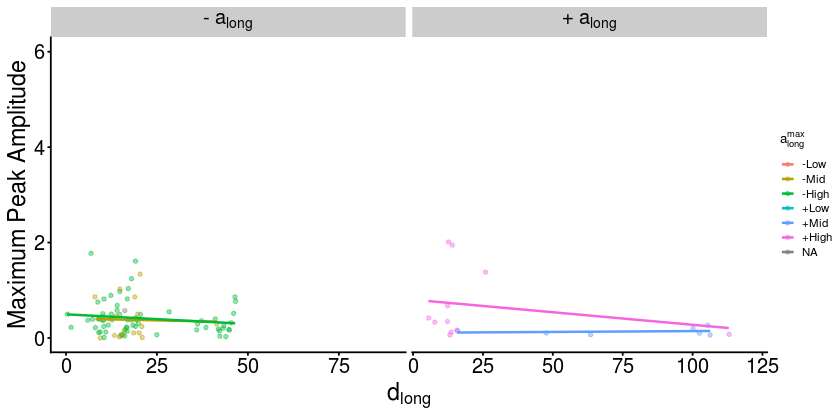

In [20]:
## MAX PEAK AMPLITUDE

# vs presence of a lead vehicle
options(repr.plot.width=3.5, repr.plot.height=3.5)
ggplot(signals, aes(present_stop, MaxPkAmp)) + 
    geom_boxplot(outlier.shape=20, outlier.alpha=0.4, width=0.2) + 
    xlab("Presence of lead vehicle") + 
    ylab("Maximum Peak Amplitude")

options(repr.plot.width=7, repr.plot.height=3.5)

# vs longitudinal acceleration
ggplot(signals, aes(MaxLongAcc, MaxPkAmp)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    facet_grid(.~pos_longA, shrink=TRUE, scales="free", labeller=label_parsed) + 
    xlab(expression(a[long]^{max})) + ylab("Maximum Peak Amplitude")

# vs longitudinal jerk
ggplot(signals, aes(MaxLongJerk, MaxPkAmp)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    facet_grid(~pos_longJ, shrink=TRUE, scales="free",
    labeller= label_parsed) +
    xlab(expression(dot(a)[long]^{max})) + 
    ylab("Maximum Peak Amplitude")

# interaction between longitudinal acceleration and lead vehicle presence
ggplot(signals, aes(MaxLongAcc, MaxPkAmp, color=present_stop)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) +
    facet_grid(.~pos_longA, shrink=TRUE, scales="free", labeller=label_parsed) +
    xlab(expression(a[long]^{max})) + 
    ylab("Maximum Peak Amplitude") +
    theme(
            axis.text = element_text(size=12),
            axis.title = element_text(size=14), 
            strip.text.x = element_text(size = 12), 
            legend.position = c(0.87, 0.2),
            legend.title = element_text(size=10),
            legend.text = element_text(size=10)
        )

# interaction between longitudinal acceleration and longitudinal distance to lead vehicle
ggplot(signals[which(signals$LongDist < 190),], aes(LongDist, MaxPkAmp, color=lvlLongA)) + 
    geom_point(shape=20, alpha=0.4, position=position_jitter(0.2)) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    labs(color=expression(a[long]^{max})) + 
    facet_grid(.~pos_longA, shrink=TRUE, scales="free", labeller=label_parsed) +
    xlab(expression(d[long])) + 
    ylab("Maximum Peak Amplitude") + 
    ylim(c(0,6)) +
    theme(
        axis.text=element_text(size=12),
        axis.title=element_text(size=14), 
        strip.text.x = element_text(size = 12))

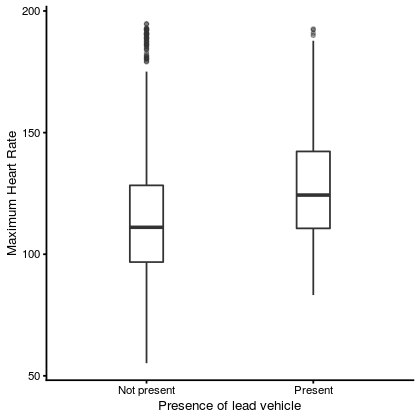

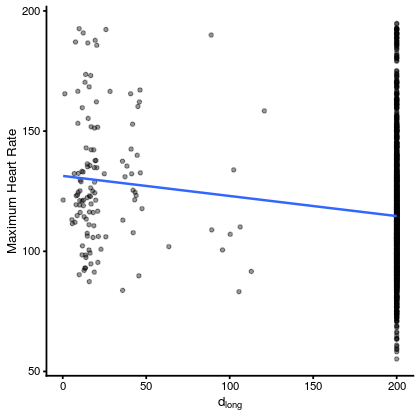

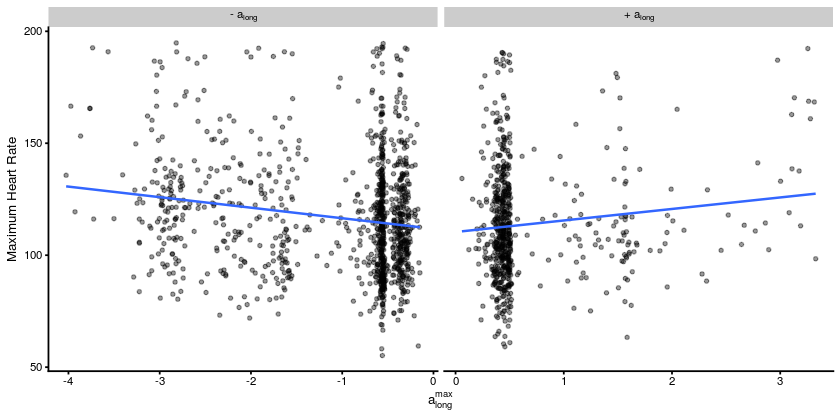

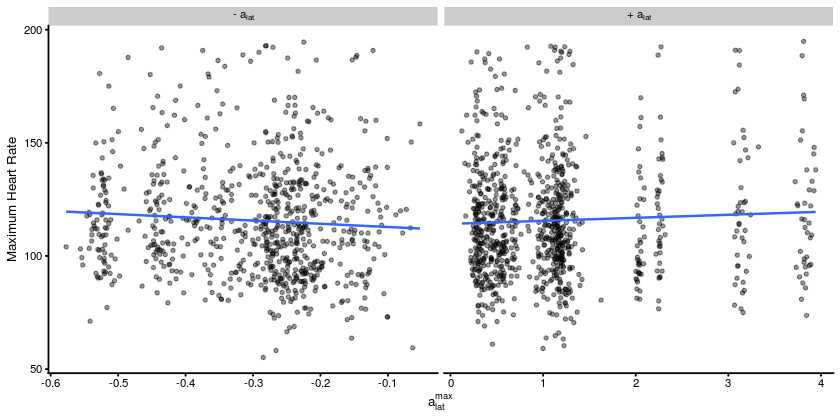

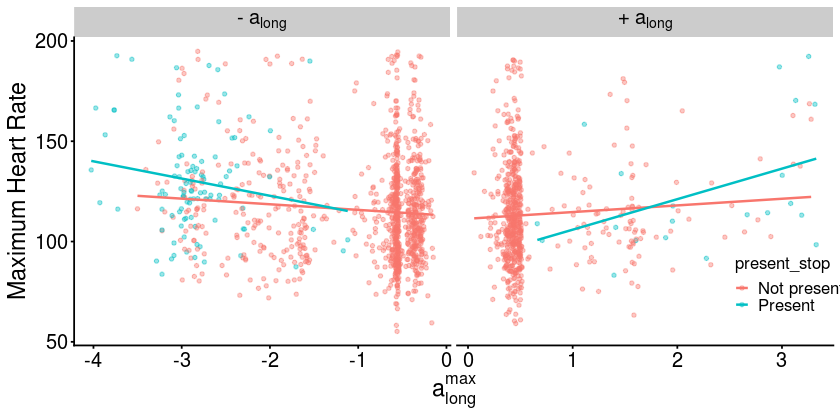

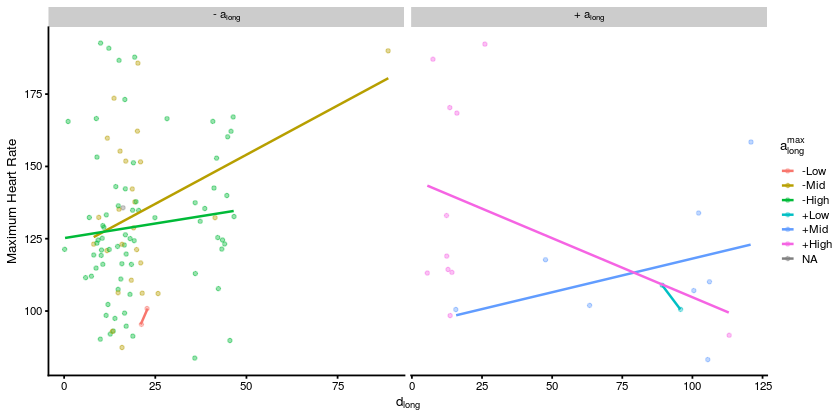

In [21]:
## Max HR

# vs presence of a lead vehicle
options(repr.plot.width=3.5, repr.plot.height=3.5)
ggplot(signals, aes(present_stop, MaxHr)) + 
    geom_boxplot(outlier.shape=20, outlier.alpha=0.4, width=0.2) + 
    xlab("Presence of lead vehicle") + 
    ylab("Maximum Heart Rate")

# vs longitudinal distance to lead vehicle
options(repr.plot.width=3.5, repr.plot.height=3.5)
ggplot(signals, aes(LongDist, MaxHr)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(d[long])) + ylab("Maximum Heart Rate")

options(repr.plot.width=7, repr.plot.height=3.5)
# vs longitudinal acceleration
ggplot(signals, aes(MaxLongAcc, MaxHr)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    facet_grid(~pos_longA, shrink=TRUE, scales="free", labeller=label_parsed) +
    xlab(expression(a[long]^{max})) + 
    ylab("Maximum Heart Rate")

# vs lateral acceleration
ggplot(signals, aes(MaxLatAcc, MaxHr)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    facet_grid(~pos_latA, shrink=TRUE, scales="free", labeller= label_parsed) +
    xlab(expression(a[lat]^{max})) + 
    ylab("Maximum Heart Rate")

# interaction between longitudinal acceleration and lead vehicle presence
ggplot(signals, aes(MaxLongAcc, MaxHr, color=present_stop)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) +
    facet_grid(.~pos_longA, shrink=TRUE, scales="free", labeller=label_parsed) +
    xlab(expression(a[long]^{max})) + 
    ylab("Maximum Heart Rate") +
    theme(
            axis.text = element_text(size=12),
            axis.title = element_text(size=14), 
            strip.text.x = element_text(size = 12), 
            legend.position = c(0.87, 0.2),
            legend.title = element_text(size=10),
            legend.text = element_text(size=10)
        )

# interaction between longitudinal acceleration and longitudinal distance to lead vehicle
ggplot(signals[which(signals$LongDist < 190),], aes(LongDist, MaxHr, color=lvlLongA)) + 
    geom_point(shape=20, alpha=0.4, position=position_jitter(0.2)) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    labs(color=expression(a[long]^{max})) + 
    facet_grid(.~pos_longA, shrink=TRUE, scales="free", labeller=label_parsed) +
    xlab(expression(d[long])) + 
    ylab("Maximum Heart Rate")

Warning message:
“Removed 348 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 348 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 348 rows containing missing values (geom_point).”

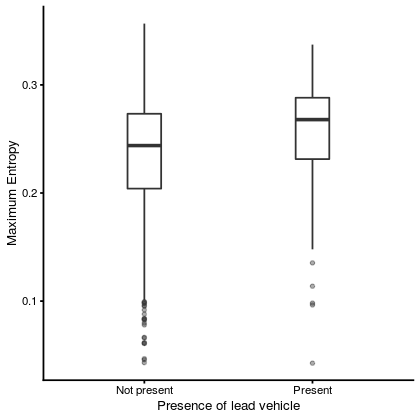

Warning message:
“Removed 348 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 348 rows containing missing values (geom_point).”

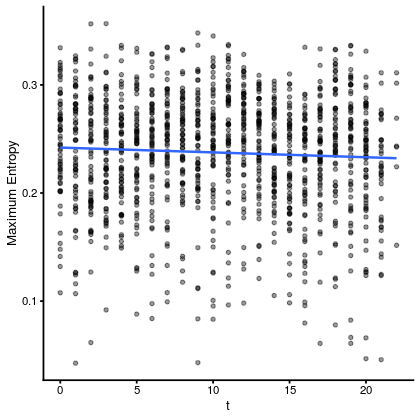

Warning message:
“Removed 348 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 348 rows containing missing values (geom_point).”

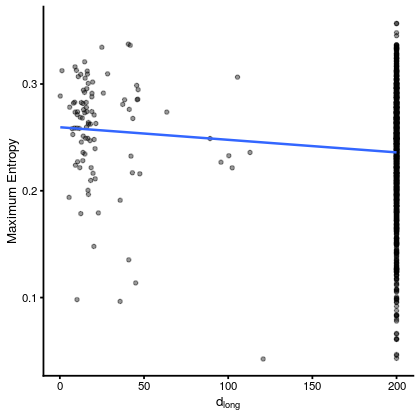

Warning message:
“Removed 348 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 348 rows containing missing values (geom_point).”

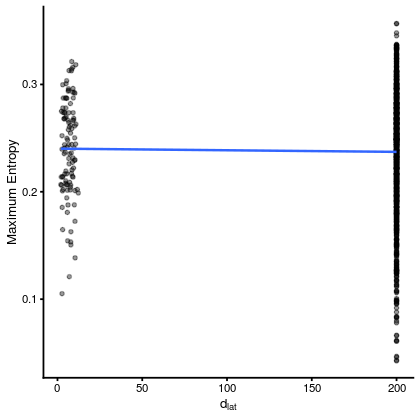

Warning message:
“Removed 348 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 348 rows containing missing values (geom_point).”

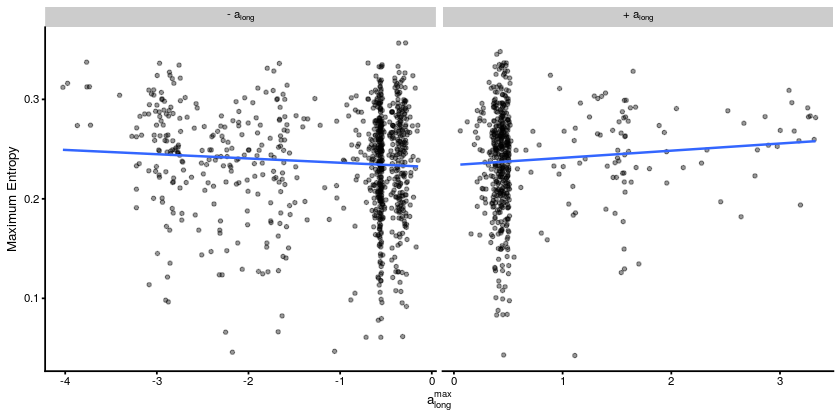

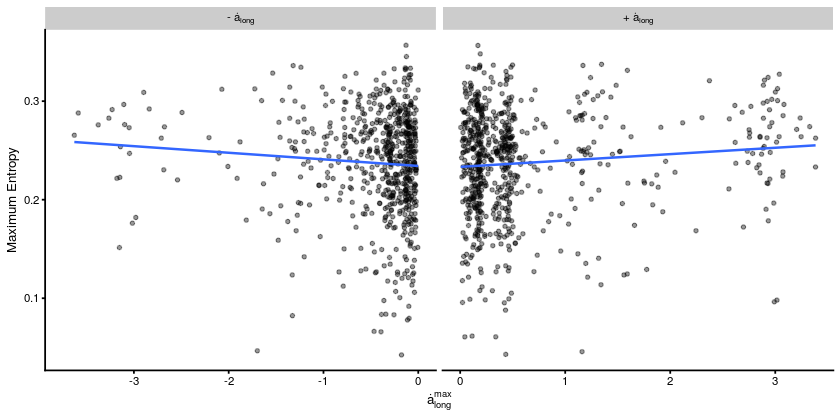

In [22]:
## Max Entropy

options(repr.plot.width=3.5, repr.plot.height=3.5)

# vs presence of a lead vehicle
ggplot(signals, aes(present_stop, MaxEntropy)) + 
    geom_boxplot(outlier.shape=20, outlier.alpha=0.4, width=0.2) + 
    xlab("Presence of lead vehicle") + 
    ylab("Maximum Entropy")

# vs time i.e. sequence number
ggplot(signals, aes(Time, MaxEntropy)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(t)) + 
    ylab("Maximum Entropy")

# vs longitudinal distance to lead vehicle
ggplot(signals, aes(LongDist, MaxEntropy)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(d[long])) + 
    ylab("Maximum Entropy")

# vs lateral distance to parked vehicle
ggplot(signals, aes(LatDist, MaxEntropy)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(d[lat])) + 
    ylab("Maximum Entropy")

options(repr.plot.width=7, repr.plot.height=3.5)
# vs longitudinal acceleration
ggplot(signals, aes(MaxLongAcc, MaxEntropy)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    facet_grid(~pos_longA, shrink=TRUE, scales="free", labeller= label_parsed) +
    xlab(expression(a[long]^{max})) + 
    ylab("Maximum Entropy")

# vs longitudinal jerk
ggplot(signals, aes(MaxLongJerk, MaxEntropy)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    facet_grid(~pos_longJ, shrink=TRUE, scales="free", labeller= label_parsed) +
    xlab(expression(dot(a)[long]^{max})) + 
    ylab("Maximum Entropy")

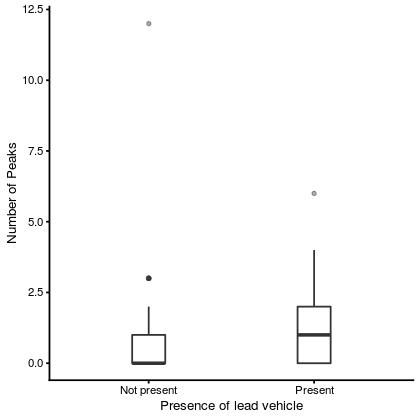

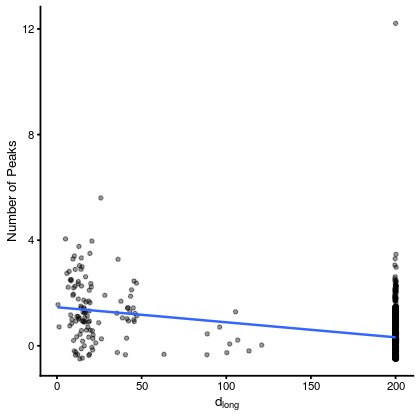

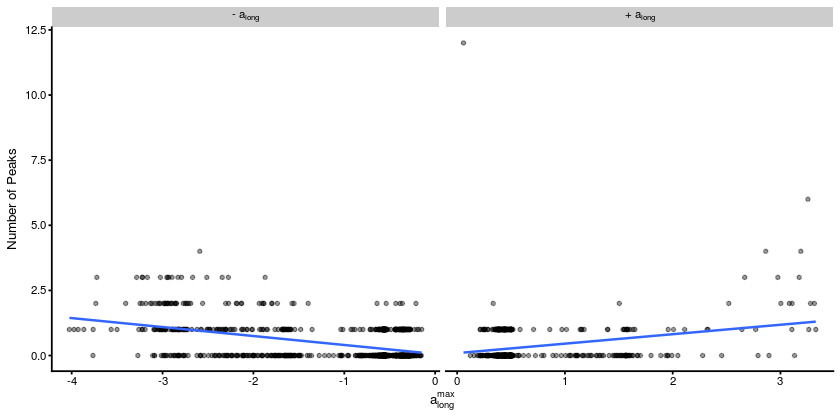

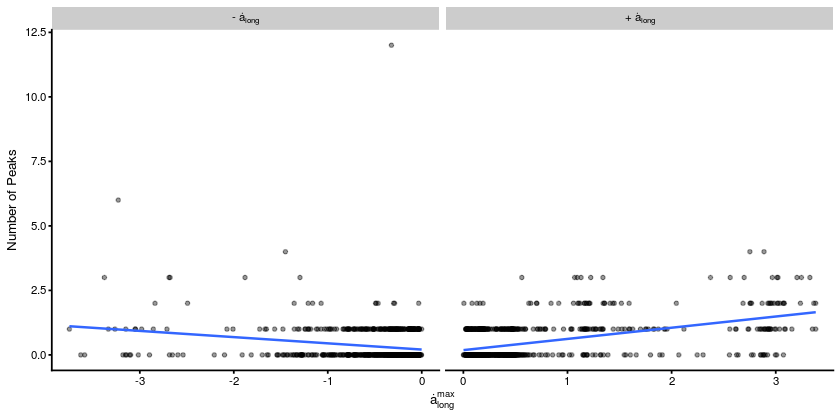

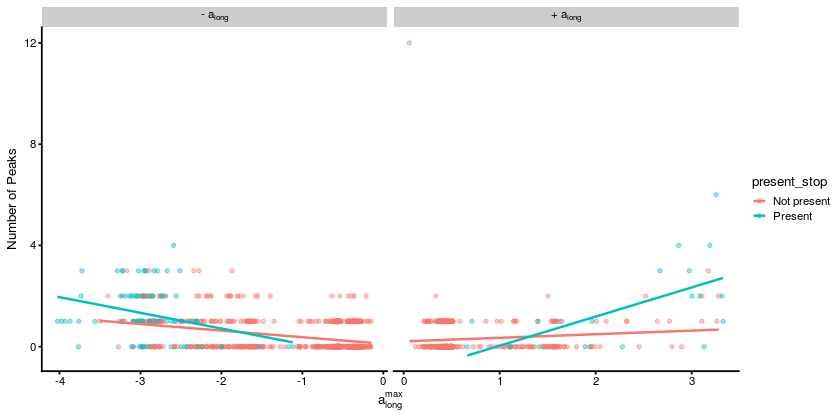

Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message:
“Removed 20 rows containing missing values (geom_smooth).”

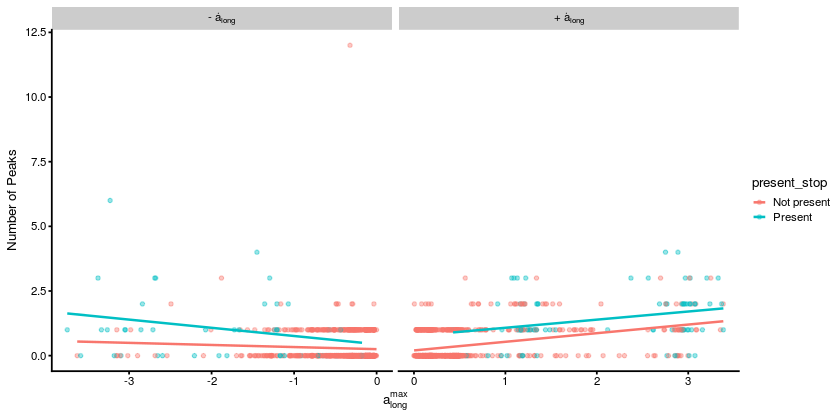

Warning message:
“Removed 16 rows containing missing values (geom_point).”Warning message:
“Removed 12 rows containing missing values (geom_smooth).”

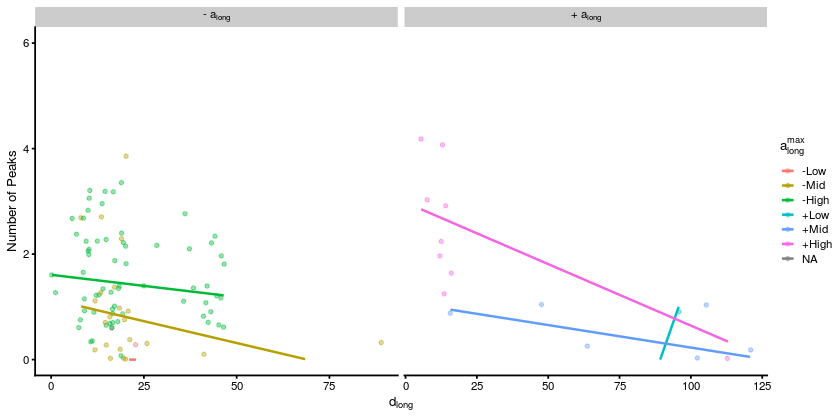

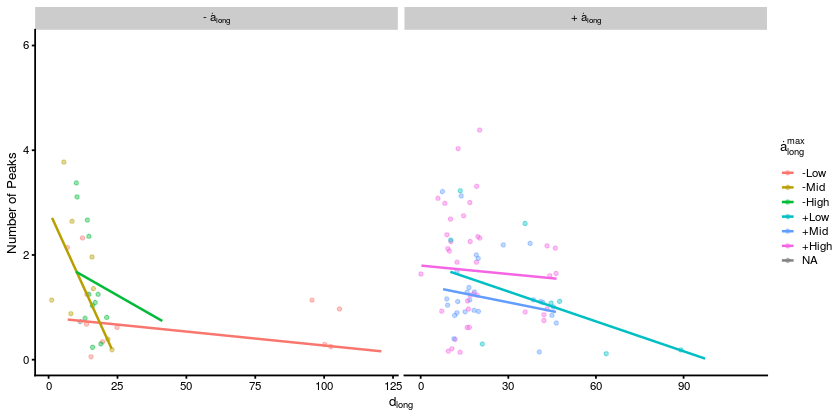

In [23]:
## Number of Peaks

options(repr.plot.width=3.5, repr.plot.height=3.5)

# vs presence of a lead vehicle
ggplot(signals, aes(present_stop, NumPks)) + 
    geom_boxplot(outlier.shape=20, outlier.alpha=0.4, width=0.2) + 
    xlab("Presence of lead vehicle") + 
    ylab("Number of Peaks")

# vs longitudinal distance
ggplot(signals, aes(LongDist, NumPks)) + 
    geom_point(shape=20, alpha=0.4, position=position_jitter(width=0.5, height=0.5)) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(d[long])) + 
    ylab("Number of Peaks")

options(repr.plot.width=7, repr.plot.height=3.5)
# vs longitudinal acceleration
ggplot(signals, aes(MaxLongAcc, NumPks)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    facet_grid(~pos_longA, shrink=TRUE, scales="free", labeller= label_parsed) +
    xlab(expression(a[long]^{max})) + 
    ylab("Number of Peaks")

# vs longitudinal jerk
ggplot(signals, aes(MaxLongJerk, NumPks)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    facet_grid(~pos_longJ, shrink=TRUE, scales="free", labeller= label_parsed) +
    xlab(expression(dot(a)[long]^{max})) + ylab("Number of Peaks")

# interaction between longitudinal acceleration and presence of a lead vehicle
ggplot(signals, aes(MaxLongAcc, NumPks, color=present_stop))+ 
    geom_point(shape=20, alpha=0.4) + geom_smooth(method='lm', se=FALSE, size=0.7) +
    facet_grid(.~pos_longA, shrink=TRUE, scales="free", labeller=label_parsed) +
    xlab(expression(a[long]^{max})) + ylab("Number of Peaks")

# interaction between longitudinal jerk and presence of a lead vehicle
ggplot(signals, aes(MaxLongJerk, NumPks, color=present_stop))+ 
    geom_point(shape=20, alpha=0.4) + geom_smooth(method='lm', se=FALSE, size=0.7) +
    facet_grid(.~pos_longJ, shrink=TRUE, scales="free", labeller=label_parsed) +
    xlab(expression(a[long]^{max})) + ylab("Number of Peaks")

# interaction between longitudinal acceleration and longitudinal distance to lead vehicle
ggplot(signals[which(signals$LongDist < 190),], aes(LongDist, NumPks, color=lvlLongA))+ 
    geom_point(shape=20, alpha=0.4, position=position_jitter(0.2)) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    labs(color=expression(a[long]^{max})) + 
    facet_grid(.~pos_longA, shrink=TRUE, scales="free", labeller=label_parsed) +
    xlab(expression(d[long])) + ylab("Number of Peaks") + ylim(c(0,6))

# interaction between longitudinal jerk and longitudinal distance to lead vehicle
ggplot(signals[which(signals$LongDist < 190),], aes(LongDist, NumPks, color=lvlLongJ))+ 
    geom_point(shape=20, alpha=0.4, position=position_jitter(0.2)) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    labs(color=expression(dot(a)[long]^{max})) + 
    facet_grid(.~pos_longJ, shrink=TRUE, scales="free", labeller=label_parsed) +
    xlab(expression(d[long])) + ylab("Number of Peaks") + ylim(c(0,6))

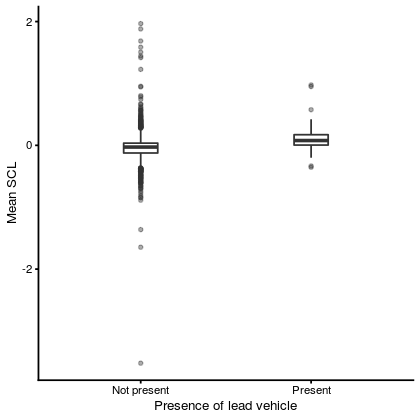

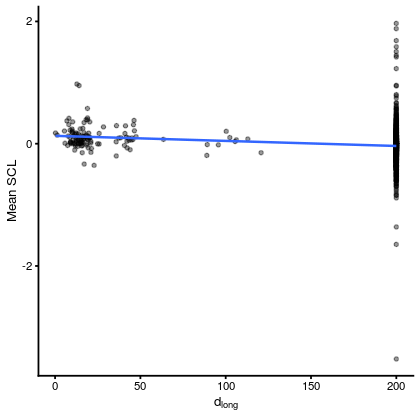

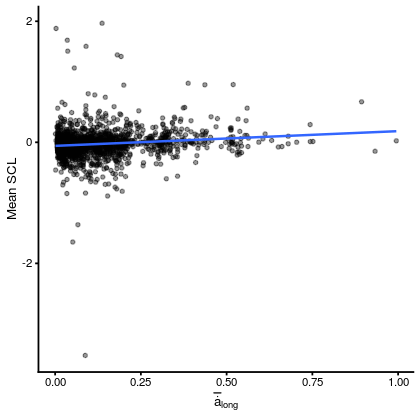

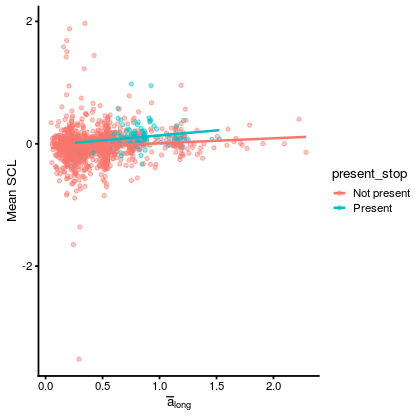

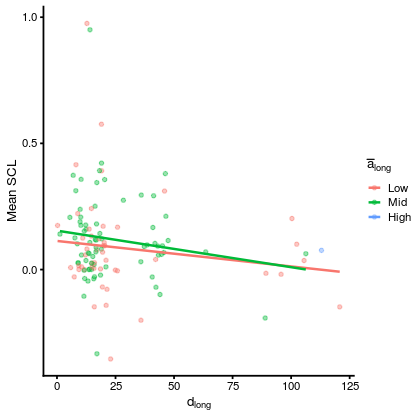

In [24]:
## Mean SCL

options(repr.plot.width=3.5, repr.plot.height=3.5)

# vs presence of a lead vehicle
ggplot(signals, aes(present_stop, MeanScl)) + 
    geom_boxplot(outlier.shape=20, outlier.alpha=0.4, width=0.2) + 
    xlab("Presence of lead vehicle") + 
    ylab("Mean SCL")

# vs longitudinal distance
ggplot(signals, aes(LongDist, MeanScl)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(d[long])) + 
    ylab("Mean SCL")

# vs longitudinal jerk
ggplot(signals, aes(MeanLongJerk, MeanScl)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(bar(dot(a))[long])) + 
    ylab("Mean SCL")

# interaction between longitudinal acceleration and presence of a lead vehicle
ggplot(signals, aes(MeanLongAcc, MeanScl, color=present_stop))+ 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) +
    xlab(expression(bar(a)[long])) + 
    ylab("Mean SCL")

# interaction between longitudinal acceleration and longitudinal distance to lead vehicle
ggplot(signals[which(signals$LongDist < 190),], aes(LongDist, MeanScl, color=meanlvlLongA)) + 
    geom_point(shape=20, alpha=0.4) +
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    labs(color=expression(bar(a)[long])) +
    xlab(expression(d[long])) + 
    ylab("Mean SCL") 

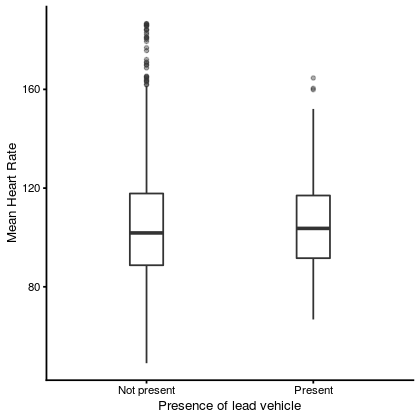

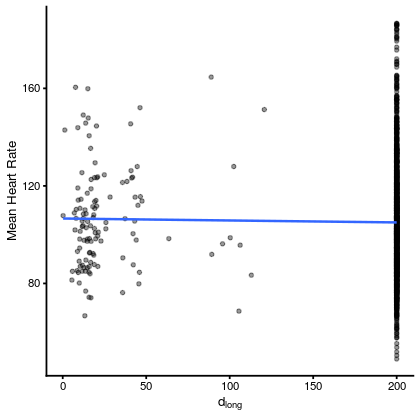

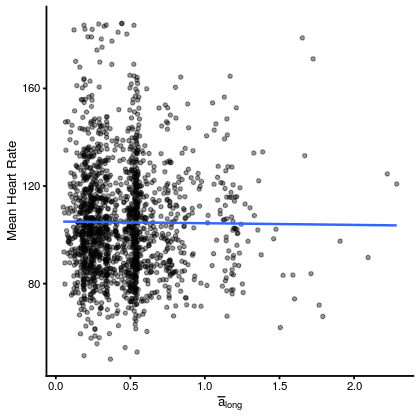

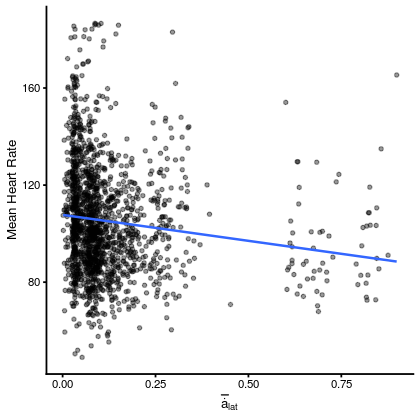

In [25]:
## Mean HR

options(repr.plot.width=3.5, repr.plot.height=3.5)

# vs presence of a lead vehicle
ggplot(signals, aes(present_stop, MeanHr)) + 
    geom_boxplot(outlier.shape=20, outlier.alpha=0.4, width=0.2) + 
    xlab("Presence of lead vehicle") + 
    ylab("Mean Heart Rate")

# vs longitudinal distance to a lead vehicle
ggplot(signals, aes(LongDist, MeanHr)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(d[long])) + 
    ylab("Mean Heart Rate")

# vs longitudinal acceleration
ggplot(signals, aes(MeanLongAcc, MeanHr)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(bar(a)[long])) + 
    ylab("Mean Heart Rate")

# vs lateral jerk
ggplot(signals, aes(MeanLatJerk, MeanHr)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(bar(dot(a))[lat])) + 
    ylab("Mean Heart Rate")

Warning message:
“Removed 348 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 348 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 348 rows containing missing values (geom_point).”

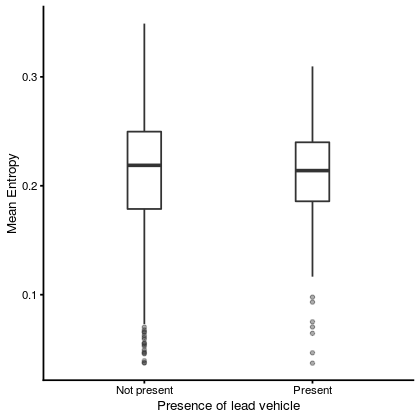

Warning message:
“Removed 348 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 348 rows containing missing values (geom_point).”

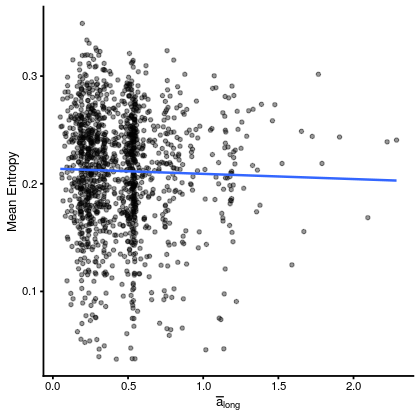

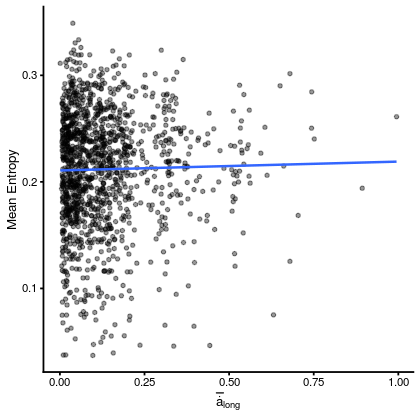

In [26]:
## Mean Entropy

options(repr.plot.width=3.5, repr.plot.height=3.5)
# vs presence of a lead vehicle
ggplot(signals, aes(present_stop, MeanEntropy)) + 
    geom_boxplot(outlier.shape=20, outlier.alpha=0.4, width=0.2) + 
    xlab("Presence of lead vehicle") + 
    ylab("Mean Entropy")

# vs longitudinal acceleration
ggplot(signals, aes(MeanLongAcc, MeanEntropy)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(bar(a)[long])) + ylab("Mean Entropy")

# vs longitudinal jerk
ggplot(signals, aes(MeanLongJerk, MeanEntropy)) + 
    geom_point(shape=20, alpha=0.4) + 
    geom_smooth(method='lm', se=FALSE, size=0.7) + 
    xlab(expression(bar(dot(a))[long])) + 
    ylab("Mean Entropy")